In [1]:
from models.direct.postDirect.RunPost import RunPost
from models.direct.postDirect.default import default
import os,glob

In [2]:
out_simula = ["output"]
join = os.path.join
sim_path = glob.glob(join(".." , "T05_simulation_direct", "output", "*"))
sim_path = [ os.path.basename(i).replace(".json","") for i in sim_path]

In [3]:
sim_path

['2024-09-18__08-19-19__42116',
 '2024-09-18__08-19-27__28692',
 '2024-09-18__08-19-42__89770',
 '2024-09-18__08-20-20__69730',
 '2024-09-18__08-24-21__60036',
 '2024-09-18__08-36-51__87313',
 '2024-09-18__08-42-00__78035',
 '2024-09-18__08-45-14__69986',
 '2024-09-18__08-55-18__34593',
 '2024-09-18__08-56-50__54116',
 '2024-09-18__08-57-44__75933',
 '2024-09-18__09-01-50__43767',
 '2024-09-18__09-03-08__44031',
 '2024-09-18__09-09-31__28671',
 '2024-09-18__09-12-08__56737',
 '2024-09-18__09-23-30__83745',
 '2024-09-18__09-25-16__82472',
 '2024-09-18__09-31-12__51643',
 '2024-09-18__09-32-49__65166',
 '2024-09-18__09-37-06__11249',
 '2024-09-18__09-38-06__34936',
 '2024-09-18__09-52-44__35930',
 '2024-09-18__09-59-03__43959',
 '2024-09-18__10-04-47__21609',
 '2024-09-18__10-09-40__88261',
 '2024-09-18__10-23-33__90439',
 '2024-09-18__10-24-40__67118',
 '2024-09-18__10-25-32__63171',
 '2024-09-18__10-31-07__64013',
 '2024-09-18__10-32-15__36951',
 '2024-09-18__10-43-08__34284',
 '2024-0

In [4]:
import numpy as np

In [5]:
params = default()
params["tensile_path"] = sim_path[-1]
params["max_mono"] = 142 # MPa


In [6]:
RunPost(params, out_simula)

Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 178.98it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 186.52it/s]


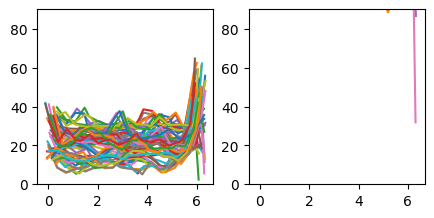

In [7]:
from matplotlib import pyplot as plt

nms = len(params["results"]["measurements"])
nnsqrt_plots = np.ceil(np.sqrt(nms))
# int 
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(5, 5))


for i in range(nms):
    plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)
    mt = params["results"]["measurements"][i]["mt"]
    mt_z = params["results"]["measurements"][i]["mt_z"]
    for imt,imt_z in zip(mt,mt_z):
        plt.plot(imt_z, imt)

    plt.ylim(0,90)

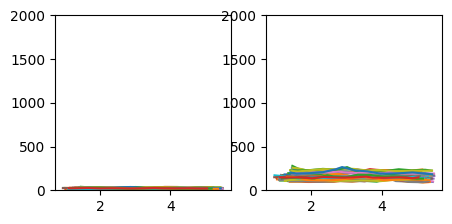

In [8]:
from matplotlib import pyplot as plt

nms = len(params["results"]["measurements"])
nnsqrt_plots = np.ceil(np.sqrt(nms))
# int 
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(5, 5))


for i in range(nms):
    plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)
    mt = params["results"]["measurements"][i]["mt"]
    mt_z = params["results"]["measurements"][i]["mt_z"]
    for imt,imt_z in zip(mt,mt_z):
        plt.plot(imt_z[3:-3], imt[3:-3])

    plt.ylim(0,2000)

In [9]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.5 # 3.241 # kg
F_hebra_sin_corr = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 142 # kg
F_trenzado_con_alma = 177 # kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 308.93 MPa
sigma_hebra = 599.68 MPa
sigma_trenzado_homogenized = 110.85 MPa
ratio = 0.515


In [10]:
steps = params["results"]["frd"]["steps"]
step_str =  [ i[:7 ] for i in steps ]
step_str = np.array(step_str)    
step_str_uq = np.unique(step_str)

indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]

A = np.pi*(0.27/2)**2
sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
F_max   = [i["sigma_max"]*A/9.8 for i in params["results"]["measurements"]]
epsilon   = [i["epsilon"] for i in params["results"]["measurements"]]
Ftotal    = [i["F_total"]/9.8 for i in params["results"]["measurements"]]

sigma_max = np.array(sigma_max)
sigma_max = sigma_max[indx]
epsilon = np.array(epsilon)
epsilon = epsilon[indx]
Ftotal = np.array(Ftotal)
Ftotal = Ftotal[indx]
F_max = np.array(F_max)
F_max = F_max[indx]

step_str_uq = step_str[indx]

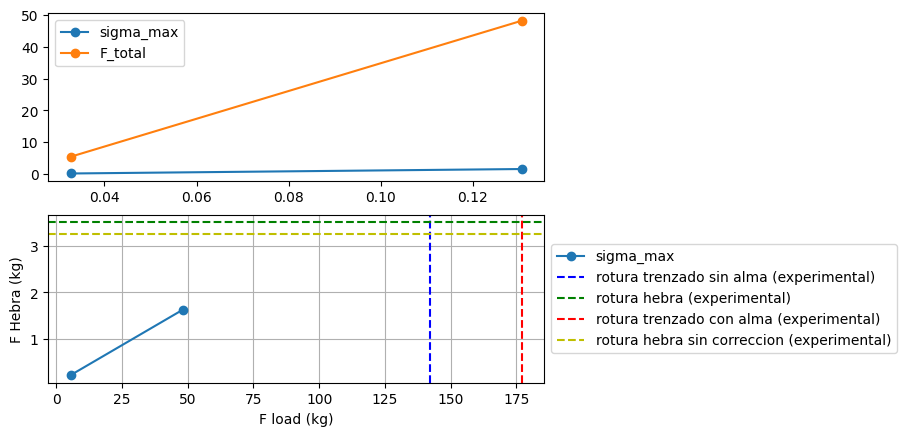

In [11]:
plt.subplot(2,1,1)

plt.plot(epsilon,F_max,label="sigma_max",marker="o")
plt.plot(epsilon,Ftotal,label="F_total",marker="o")
plt.legend()

# 120 MPa rotura trenzado 
s_rotura_trenzado = 120
# horizontal line
plt.subplot(2,1,2)
plt.plot(Ftotal,F_max,label="sigma_max",marker="o")


plt.axvline(x=F_trenzado_kg, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")


plt.axvline(x=F_trenzado_con_alma, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axhline(y=F_hebra_sin_corr, color='y', linestyle='--',label="rotura hebra sin correccion (experimental)")

#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
F_trenzado_con_alma

177

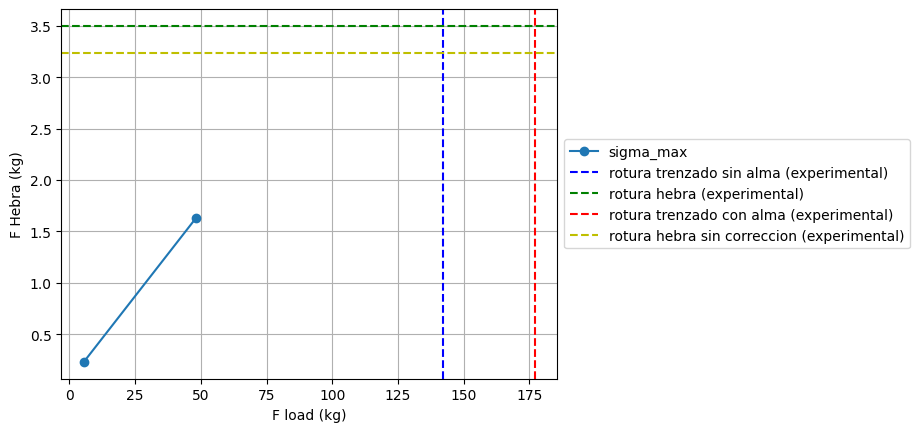

In [13]:

plt.plot(Ftotal,F_max,label="sigma_max",marker="o")


plt.axvline(x=F_trenzado_kg, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")


plt.axvline(x=F_trenzado_con_alma, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axhline(y=F_hebra_sin_corr, color='y', linestyle='--',label="rotura hebra sin correccion (experimental)")

#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
ratio = [i["ratio"] for i in params["results"]["measurements"]]
ratio_new = [i["ratio_new"] for i in params["results"]["measurements"]]

plt.plot(ratio,label="ratio",marker="o")
plt.plot(ratio_new,label="ratio_new",marker="o")

KeyError: 'ratio'

In [ ]:
np.max(mt)

In [ ]:
imt[3:-3]

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure()

for imt in mt:
    plt.plot(imt[3:-3],marker="o")

In [ ]:
params["results"]["sigma_max"]

In [ ]:
def ComputeStrength(F, D):
    # F in kg
    # D in mm
    A = np.pi*(D/2)**2
    F = F*9.81
    return F/A

In [ ]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.241 # kg
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

In [ ]:
F_trenzado = 177.667 # kg
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 80 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

In [ ]:
# Homogenizado trenzado
Atrenzado_hom = np.pi*(dia_trenzado/2)**2
sigma_trenzado_hom = F_trenzado/Atrenzado_hom # MPa
print(f"sigma_trenzado_hom = {sigma_trenzado_hom:.2f} MPa")

In [ ]:
#comparacion entre A hebra y A trenzado
print(f"A_trenzado_hom = {Atrenzado_hom:.2f} mm2")
print(f"A_trenzado = {Atrenzado:.2f} mm2")

In [ ]:
F_trenzado/(F_hebra*(64+15))
